# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2024-11-13 04:00:08--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2024-11-13 04:00:09--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [7]:
data = pd.read_csv("Gender_bias_spanish.csv")

In [4]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [10]:
data.head(10)

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
5,yo solo quiero a alguien que odie a7x conmigo,non-biased
6,mi mamá cumple años hoy. y este es uno de los ...,non-biased
7,@pvaya @sailor_tesserei @sh3rrymh es que es un...,non-biased
8,#eneneroyo estaré más al pendiente de mi famil...,non-biased
9,@yolanday_y @el_pais tras 72.000 años de viaje...,non-biased


In [12]:
# Resumen del conjunto de datos
data.info()
# Contar la cantidad de tweets por etiqueta
data["Label"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


,count
Label,
non-biased,1596
biased,318


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

In [14]:
tipos=data["Label"].value_counts()
divición=tipos/len(data)
divición

,count
Label,
non-biased,0.833856
biased,0.166144


Biased **16%**
Non-biased **83%**

Esto sirve para saber la cantidad de tweets son parciales e imparciales y enfocar campañas de marketing con gente que tenga ideologias acordes a la campaña.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [ ]:
## Cree una funcion limpiar texto

In [18]:
def limpiar_data(data):
    data = data.lower()
    data = re.sub(r'[^\w\s]', '', data)
    palabras = data.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [20]:
def contar_palabras(data):
    palabras = limpiar_data(data)
    return Counter(palabras)
data['word_counts'] = data['Contents'].apply(contar_palabras)

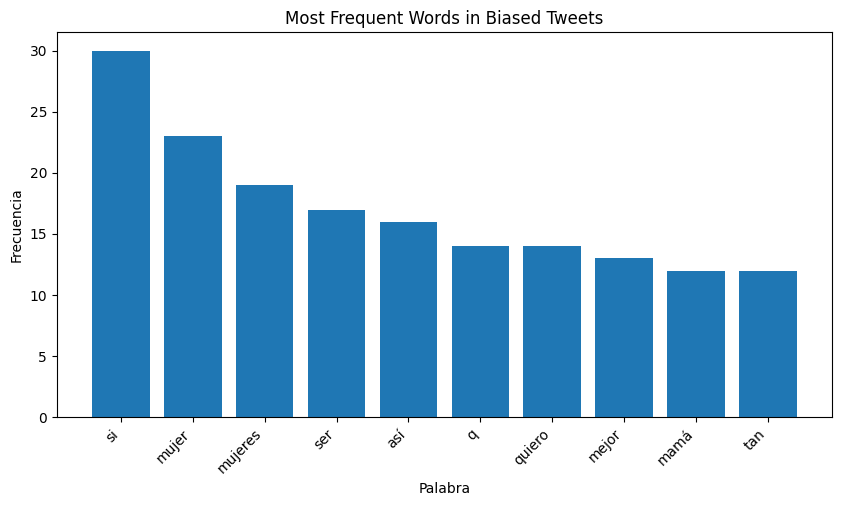

In [23]:
biased_word_counts = data[data['Label'] == 'biased']['word_counts'].sum()
non_biased_word_counts = data[data['Label'] == 'non-biased']['word_counts'].sum()

biased_df = pd.DataFrame(biased_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
non_biased_df = pd.DataFrame(non_biased_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

import matplotlib.pyplot as plt

top_biased_words = biased_df.head(10)  # Get the top 10 words
plt.figure(figsize=(10, 5))
plt.bar(top_biased_words['Word'], top_biased_words['Count'])
plt.title('Most Frequent Words in Biased Tweets')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

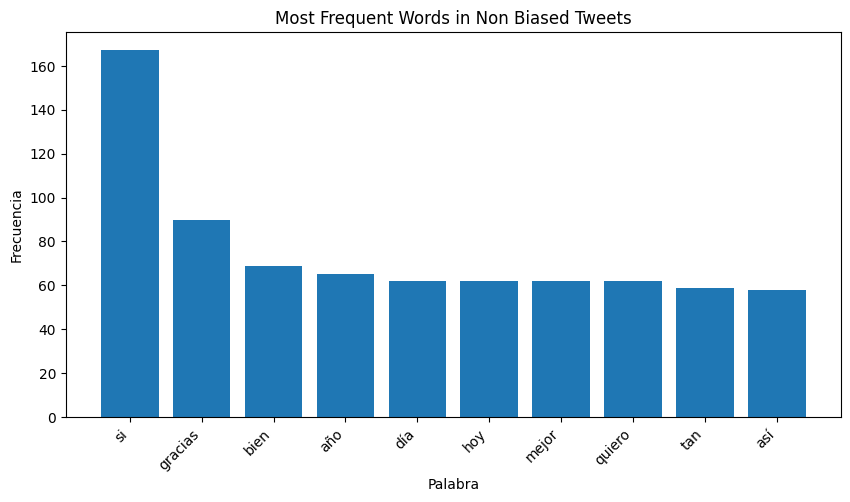

In [24]:
top_non_biased_words = non_biased_df.head(10)  # Get the top 10 words
plt.figure(figsize=(10, 5))
plt.bar(top_non_biased_words['Word'], top_non_biased_words['Count'])
plt.title('Most Frequent Words in Non Biased Tweets')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

Este análisis sugiere que las palabras "ser", "q", "mujer" y "mujeres" aparecen con mayor frecuencia en los tweets que muestran algún tipo de sesgo. Las empresas pueden aprovechar este conocimiento para identificar y analizar los contenidos con opiniones sesgadas, ya que los tweets con estas palabras indican un lenguaje más informal y, en el caso de "ser", reflejan una postura clara sobre temas específicos. Este entendimiento permite a las empresas ajustar su comunicación y estrategias para conectar mejor con la percepción y los sentimientos de sus consumidores, ofreciendo respuestas más adecuadas y alineadas con sus expectativas y preocupaciones.

## 5. Análisis de Sentimientos
Usaremos TextBlob para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [30]:
from textblob import TextBlob

def analizar_sentimiento(data):

    if isinstance(data, str):
        blob = TextBlob(data)
        return blob.sentiment.polarity
    else:
        return None  # En caso de que el texto no sea una cadena, devolvemos None

data['sentimiento'] = data['Contents'].apply(analizar_sentimiento)

# Ver el resultado
print(data[['Contents', 'sentimiento']])

                                               Contents  sentimiento
0     @chumeltorres ya cabrón! sin tí se reciben las...          0.0
1     ¿alguien es tan amable de ir a hacerme la comp...          0.0
2     @jenniferduquee hahaha, si está rico, nadamas ...          0.2
3     @evagelcot donde lo ves!!? es mi programa favo...          0.0
4     como siempre mi tortilla triunfa mas que otros...          0.0
...                                                 ...          ...
1909  iba a ir a dash pero mis 3 cortadas, mi color ...          0.0
1910  que pinche chiste tiene estar medio alto si to...          0.0
1911  si fuera bien idiota. ya hubiera comprado un a...          0.0
1912  nota mental: no le quieras ayudar a alguien qu...         -0.1
1913  vamos @arvenlol, dales duro como tú sabes  #lo...          0.0

[1914 rows x 2 columns]


             count      mean       std  min  25%  50%  75%  max
Label                                                          
biased       318.0  0.001232  0.128171 -1.0  0.0  0.0  0.0  0.8
non-biased  1596.0  0.001849  0.111932 -1.0  0.0  0.0  0.0  1.0


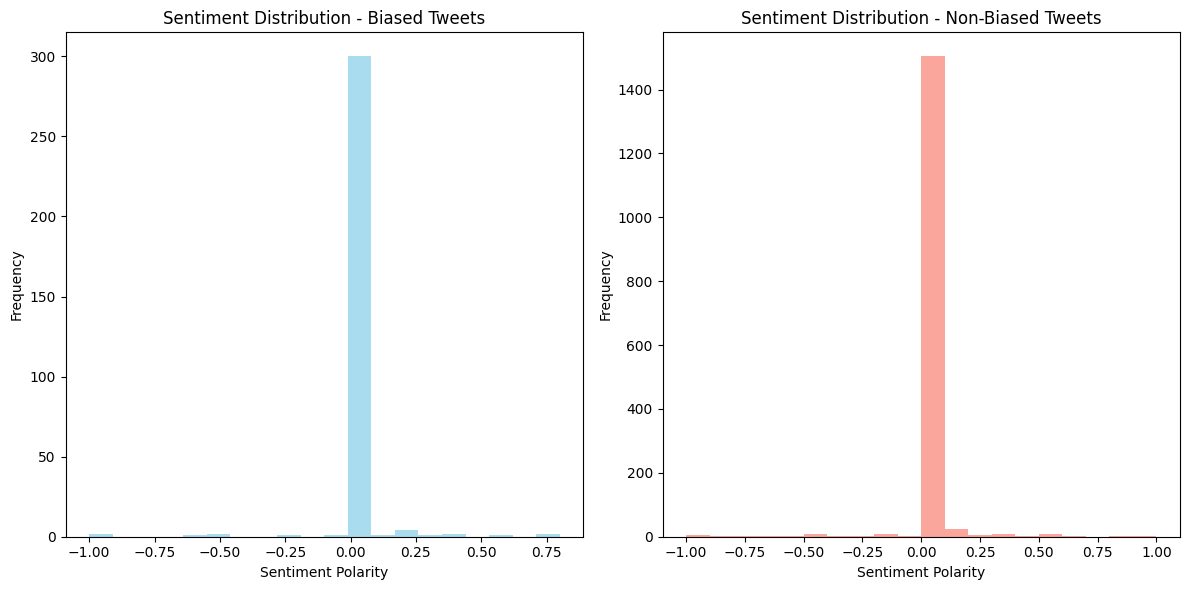

<Figure size 800x600 with 0 Axes>

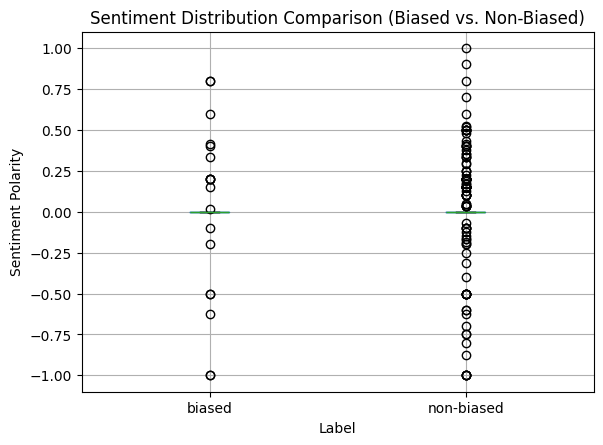

In [32]:
# prompt: compará la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

# Group data by 'Label' and calculate sentiment distribution statistics
sentiment_distribution = data.groupby('Label')['sentimiento'].describe()

# Print the distribution
print(sentiment_distribution)

# Plotting Histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data[data['Label'] == 'biased']['sentimiento'], bins=20, color='skyblue', alpha=0.7)
plt.title('Sentiment Distribution - Biased Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data[data['Label'] == 'non-biased']['sentimiento'], bins=20, color='salmon', alpha=0.7)
plt.title('Sentiment Distribution - Non-Biased Tweets')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplot comparison
plt.figure(figsize=(8, 6))
data.boxplot(column='sentimiento', by='Label')
plt.title('Sentiment Distribution Comparison (Biased vs. Non-Biased)')
plt.suptitle('')  # Remove the default boxplot title
plt.ylabel('Sentiment Polarity')
plt.show()

**Preguntas de Análisis de Sentimientos:**

*   ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
*   ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
*   ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?





Los tweets imparciales suelen expresar sentimientos más neutrales, mientras que los sesgados tienden a tener un mayor grado de emociones, ya sean positivas o negativas. Esto sugiere que los tweets sesgados se escriben generalmente en un estado emocional, o reflejan el impacto emocional de un tema, en contraste con la perspectiva más neutral de los tweets imparciales.

Esta diferencia indica que los tweets sesgados suelen nacer de una reacción emocional o de la intención de expresar emociones sobre un tema, en lugar de una visión objetiva o de "cabeza fría".

Para utilizar el análisis de sentimientos en la comprensión de la percepción del público sobre un tema específico, se podría empezar filtrando y recopilando tweets relacionados con dicho tema. Luego, se procede a limpiar los datos, contar las palabras más frecuentes para identificar patrones, y finalmente realizar el análisis de sentimientos. Utilizando gráficos de densidad, se puede visualizar más fácilmente la opinión pública sobre el tema, lo que permite tomar decisiones alineadas con los objetivos del estudio.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [39]:
data['cleaned_Contents'] = data['Contents'].apply(limpiar_data)
def generar_nube_palabras(texto):
    # Unir todas las listas de palabras limpias en un solo string
    palabras = ' '.join([palabra for lista in texto for palabra in lista])  # Aplanamos la lista de listas
    # Generamos la nube de palabras
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    # Mostramos la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')  # No mostrar los ejes
    plt.show()


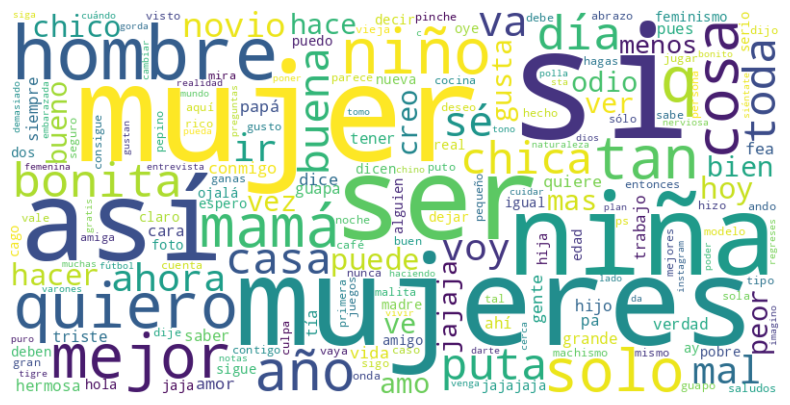

In [40]:
biased_texts = data[data['Label'] == 'biased']['cleaned_Contents']
generar_nube_palabras(biased_texts)

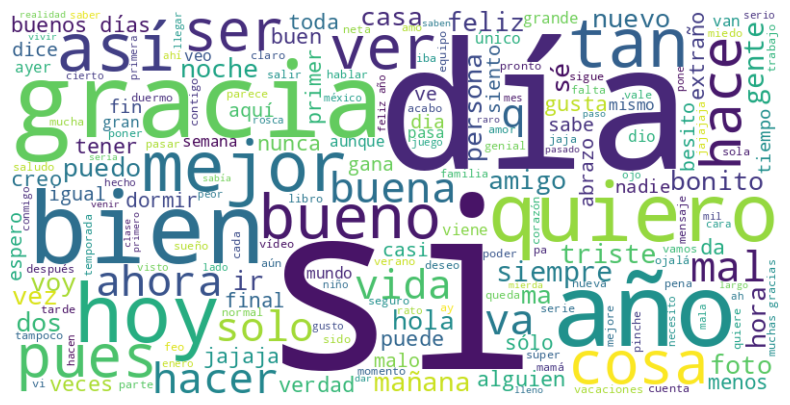

In [41]:
non_biased_texts = data[data['Label'] == 'non-biased']['cleaned_Contents']
generar_nube_palabras(non_biased_texts)

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

El análisis de tweets sesgados o imparciales ofrece a las marcas una comprensión profunda del lenguaje y tono que su público objetivo emplea. Esto permite adaptar la comunicación de la marca para alinearse mejor con los deseos y expectativas de los consumidores, reconocer cómo se percibe la marca y entender las emociones que despierta en el público.

Si se detecta que los tweets sobre la marca son predominantemente sesgados, la campaña de marketing puede ajustarse de varias maneras. Primero, se podría analizar qué mensaje o emociones quiere expresar el público y, con base en ello, orientar la campaña para reafirmar los comentarios positivos o contrarrestar los negativos. La marca también podría adoptar una postura específica que conecte emocionalmente con la audiencia, favoreciendo la resonancia de los mensajes.

En un análisis futuro, podría ser relevante explorar patrones como el impacto de las opiniones en redes sociales sobre la percepción de la marca y la identificación de tendencias que sugieran oportunidades para innovar en productos o servicios. Además, se podrían realizar segmentaciones para dirigirse a públicos específicos en función de su comportamiento y opiniones en internet, logrando así una comunicación más efectiva y personalizada.